## Machine Learning

#### Imports defined

In [1]:
import altair as alt
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import time

#alt.renderers.enable('notebook')

alt.data_transformers.disable_max_rows()

C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


DataTransformerRegistry.enable('default')

#### Reading the csv file and storing it into a dataframe named 'sales_data'

In [2]:
sales_data = pd.read_csv('Sales_Data_Large.csv')

C:\Users\Admin\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (6,14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
print(sales_data.shape)
initial_rows = sales_data.size

(2001234, 24)


In [4]:
sales_data.head()

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,...,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
0,INV-00013800025,2016-08-29,2554,Hy-Vee Food Store / Davenport,3019 Rockingham Road,Davenport,52802,POINT (-90.620725 41.510523),82.0,SCOTT,...,35913,Five O'clock Vodka,48,200,1.13,1.70,1,81.60,0.20,0.05
1,INV-17521500009,2019-02-13,2556,Hy-Vee Wine and Spirits / Estherville,1033 Central Avenue,Estherville,51334,POINT (-94.829962 43.402096),32.0,EMMET,...,86739,Ole Smoky Apple Pie Moonshine 70prf Mini,8,300,8.75,13.13,8,105.04,2.40,0.63
2,S29979600003,2016-01-05,4255,FAREWAY STORES #058 / ORANGE CITY,512 8TH SE,ORANGE CITY,51041,NaN,84.0,Sioux,...,339,Kinky Vodka Martini Pack,6,3600,10.00,15.00,1,15.00,3.60,0.95
3,INV-22806000062,2019-10-25,5210,Ding's Honk'n Holler,"900, E Washington St",Clarinda,51632,POINT (-95.027238 40.739231),73.0,PAGE,...,86739,Ole Smoky Apple Pie Moonshine 70prf Mini,8,50,8.75,13.13,1,13.13,0.05,0.01
4,INV-06002100029,2017-07-11,2285,John's Grocery,401 East Market St,Iowa City,52240,POINT (-91.529854 41.663541),52.0,JOHNSON,...,76032,Midnight Moon Original,6,750,11.50,17.25,18,310.50,13.50,3.57


### 1. Missing Values Analysis

Missing value analysis helps address several concerns caused by incomplete data. It is a preliminary step in data preparation. Replacing/dropping the missing values are dependent on many factors. Numerical data are mostly replaced by median/mean, whereas categorical values are replaced with mode.

In [5]:
sales_data.isnull().sum().sort_values(ascending=False)

store_location             192024
category_name               23454
category                    15749
county_number               15612
county                      15612
zip_code                     5718
address                      5713
city                         5713
vendor_number                   2
date                            0
store_number                    0
store_name                      0
volume_sold_gallons             0
volume_sold_liters              0
vendor_name                     0
item_number                     0
item_description                0
pack                            0
bottle_volume_ml                0
state_bottle_cost               0
state_bottle_retail             0
bottles_sold                    0
sale_dollars                    0
invoice_and_item_number         0
dtype: int64

#### Plotting the counts of missing values in the respective columns.

In [6]:
source = pd.DataFrame({
'Store_Location': ['NA', 'NON-NA'],
'Count': [sales_data['store_location'].isna().sum(),
      len(sales_data) - sales_data['store_location'].isna().sum()
     ]
    })

alt.Chart(source).mark_bar().encode(
    x = 'Store_Location',
    y ='Count'
)

alt.Chart(...)

In [7]:
source = pd.DataFrame({
'Category_Name': ['NA', 'NON-NA'],
'Count': [sales_data['category_name'].isna().sum(),
      len(sales_data) - sales_data['category_name'].isna().sum()
     ]
    })

alt.Chart(source).mark_bar().encode(
    x = 'Category_Name',
    y ='Count'
)

alt.Chart(...)

In [8]:
source = pd.DataFrame({
'Category': ['NA', 'NON-NA'],
'Count': [sales_data['category'].isna().sum(),
      len(sales_data) - sales_data['category'].isna().sum()
     ]
    })

alt.Chart(source).mark_bar().encode(
    x = 'Category',
    y ='Count'
)

alt.Chart(...)

In [9]:
source = pd.DataFrame({
'County_Number': ['NA', 'NON-NA'],
'Count': [sales_data['county_number'].isna().sum(),
      len(sales_data) - sales_data['county_number'].isna().sum()
     ]
    })

alt.Chart(source).mark_bar().encode(
    x = 'County_Number',
    y ='Count'
)

alt.Chart(...)

In [10]:
source = pd.DataFrame({
'County': ['NA', 'NON-NA'],
'Count': [sales_data['county'].isna().sum(),
      len(sales_data) - sales_data['county'].isna().sum()
     ]
    })

alt.Chart(source).mark_bar().encode(
    x = 'County',
    y ='Count'
)

alt.Chart(...)

In [11]:
source = pd.DataFrame({
'Address': ['NA', 'NON-NA'],
'Count': [sales_data['address'].isna().sum(),
      len(sales_data) - sales_data['address'].isna().sum()
     ]
    })

alt.Chart(source).mark_bar().encode(
    x = 'Address',
    y ='Count'
)

alt.Chart(...)

In [12]:
source = pd.DataFrame({
'City': ['NA', 'NON-NA'],
'Count': [sales_data['city'].isna().sum(),
      len(sales_data) - sales_data['city'].isna().sum()
     ]
    })

alt.Chart(source).mark_bar().encode(
    x = 'City',
    y ='Count'
)

alt.Chart(...)

In [13]:
source = pd.DataFrame({
'Zip_Code': ['NA', 'NON-NA'],
'Count': [sales_data['zip_code'].isna().sum(),
      len(sales_data) - sales_data['zip_code'].isna().sum()
     ]
    })

alt.Chart(source).mark_bar().encode(
    x = 'Zip_Code',
    y ='Count'
)

alt.Chart(...)

#### Dropping the NA rows from the dataframe, as they are very few in number. Filling them arbitarily will impact the sanity of the data.

In [14]:
sales_data.dropna(axis = 0, inplace = True)

In [15]:
sales_data.isnull().sum().sort_values(ascending=False)

volume_sold_gallons        0
volume_sold_liters         0
date                       0
store_number               0
store_name                 0
address                    0
city                       0
zip_code                   0
store_location             0
county_number              0
county                     0
category                   0
category_name              0
vendor_number              0
vendor_name                0
item_number                0
item_description           0
pack                       0
bottle_volume_ml           0
state_bottle_cost          0
state_bottle_retail        0
bottles_sold               0
sale_dollars               0
invoice_and_item_number    0
dtype: int64

In [16]:
print(sales_data.shape)

final_rows = sales_data.size

data_loss = ((initial_rows - final_rows)/initial_rows)*100

print('Loss in data is {:.3f}%'.format(data_loss))

(1779063, 24)
Loss in data is 11.102%


### 2. Data Cleaning

A mandatory step in preparing the data for ML algorithms. Most of the real world data is not clean and happens to contain many junk and unnecessary values. Deriving useful and meaningful representation from such data eases the later steps of data analysis and data processing.

In [17]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1779063 entries, 0 to 2001233
Data columns (total 24 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   invoice_and_item_number  object 
 1   date                     object 
 2   store_number             int64  
 3   store_name               object 
 4   address                  object 
 5   city                     object 
 6   zip_code                 object 
 7   store_location           object 
 8   county_number            float64
 9   county                   object 
 10  category                 float64
 11  category_name            object 
 12  vendor_number            float64
 13  vendor_name              object 
 14  item_number              object 
 15  item_description         object 
 16  pack                     int64  
 17  bottle_volume_ml         int64  
 18  state_bottle_cost        float64
 19  state_bottle_retail      float64
 20  bottles_sold             int64  
 21  sale_dol

#### Caterorising the liquor into various groups. Analysis found 'beer', 'vodka', 'whiskey' and 'gin' to have the most occurances. Rest all liquor type are renamed as 'others'.

In [18]:
sales_data['type_beer']   = sales_data['category_name'].str.lower().str.contains('beer')
sales_data['type_vodka']  = sales_data['category_name'].str.lower().str.contains('vodka')
sales_data['type_whisky'] = sales_data['category_name'].str.lower().str.contains('whisk')
sales_data['type_gin']    = sales_data['category_name'].str.lower().str.contains('gin')

sales_data['consolidated_category'] = ''

sales_data.loc[sales_data.type_beer == True, 'consolidated_category'] = 'beer'
sales_data.loc[sales_data.type_vodka == True, 'consolidated_category'] = 'vodka'
sales_data.loc[sales_data.type_whisky == True, 'consolidated_category'] = 'whisky'
sales_data.loc[sales_data.type_gin == True, 'consolidated_category'] = 'gin'

sales_data.loc[((sales_data.type_beer == False) & 
                (sales_data.type_vodka == False) & 
                (sales_data.type_whisky == False) & 
                (sales_data.type_gin == False)) , 'consolidated_category'] = 'others'

#### Dropping the intermediate columns.

In [19]:
sales_data.drop(columns =['category_name',
                          'type_beer',
                          'type_vodka',
                          'type_whisky',
                          'type_gin'], inplace =True)

#### Extracting day, month and year values from the date into separate columns.

In [20]:
sales_data["date"] =  pd.to_datetime(sales_data["date"], format='%Y-%m-%d')

sales_data.insert(loc = 0, column = 'day', value = sales_data['date'].map(lambda x: x.day))
sales_data.insert(loc = 0, column = 'month', value = sales_data['date'].map(lambda x: x.month))
sales_data.insert(loc = 0, column = 'year', value = sales_data['date'].map(lambda x: x.year))

#### Creating column 'weekday' to identify the name of the days.

In [21]:
sales_data['weekday'] = sales_data['date'].dt.day_name()

#### Grouping weekday into boolean representaion for workday(0) and weekend(1).

- Workday = Monday to Friday<br>
- Weekend = Saturday and Sunday

In [22]:
sales_data['holiday'] = np.where( sales_data['weekday'].isin(['Saturday','Sunday']), 'Weekend', 'Workday')

#### Verifying the conversion

In [23]:
sales_data[sales_data['weekday'].isin(['Saturday','Sunday'])].head()


,year,month,day,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,...,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,consolidated_category,weekday,holiday
334,2019,9,29,INV-22197000065,2019-09-29,2527,Hy-Vee Food Store #5 / Des Moines,1107 SE Army Post Rd,Des Moines,50315,...,50,8.75,13.13,16,210.08,0.80,0.21,others,Sunday,Weekend
634,2015,11,21,S29193500030,2015-11-21,3963,Tobacco Hut #14 / Council Bluffs,1925 W BROADWAY,COUNCIL BLUFFS,51501,...,200,1.96,2.94,1,2.94,0.20,0.05,others,Saturday,Weekend
823,2019,11,23,INV-23437000011,2019-11-23,4472,Quick Shop Foods / Centerville,1023 South Main,Centerville,52544,...,850,10.00,15.00,6,90.00,5.10,1.34,others,Saturday,Weekend
922,2019,6,15,INV-20017000020,2019-06-15,5237,World Liquor & Tobacco + Vape,"606, N 15th St",Fort Dodge,50501,...,50,8.75,13.13,1,13.13,0.05,0.01,others,Saturday,Weekend
954,2019,4,13,INV-18740500064,2019-04-13,5210,Ding's Honk'n Holler,"900, E Washington St",Clarinda,51632,...,300,8.75,13.13,1,13.13,0.30,0.07,others,Saturday,Weekend


In [24]:
sales_data[~sales_data['weekday'].isin(['Saturday','Sunday'])].head()

,year,month,day,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,...,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,consolidated_category,weekday,holiday
0,2016,8,29,INV-00013800025,2016-08-29,2554,Hy-Vee Food Store / Davenport,3019 Rockingham Road,Davenport,52802,...,200,1.13,1.70,1,81.60,0.20,0.05,vodka,Monday,Workday
1,2019,2,13,INV-17521500009,2019-02-13,2556,Hy-Vee Wine and Spirits / Estherville,1033 Central Avenue,Estherville,51334,...,300,8.75,13.13,8,105.04,2.40,0.63,others,Wednesday,Workday
3,2019,10,25,INV-22806000062,2019-10-25,5210,Ding's Honk'n Holler,"900, E Washington St",Clarinda,51632,...,50,8.75,13.13,1,13.13,0.05,0.01,others,Friday,Workday
4,2017,7,11,INV-06002100029,2017-07-11,2285,John's Grocery,401 East Market St,Iowa City,52240,...,750,11.50,17.25,18,310.50,13.50,3.57,others,Tuesday,Workday
5,2016,8,31,INV-00067600042,2016-08-31,2594,Hy-Vee Food Store / Sioux City,4500 Sergeant Road,Sioux City,51106,...,1000,11.92,17.88,2,214.56,2.00,0.52,vodka,Wednesday,Workday


#### Creating a column to represent the season of the year based on month numbers. Below are the considerations

- Spring : March to May<br>
- Summer : June to August<br>
- Fall   : September to November<br>
- Winter : December to February


In [25]:
def season (row):
    
    if ((row['month'] > 2) & (row['month'] < 6)):  #3,4,5
        return 'Spring'
    if ((row['month'] > 5) & (row['month'] < 9)):  #6,7,8
        return 'Summer'
    if ((row['month'] > 8) & (row['month'] < 12)): #9,10,11 
        return 'Fall'
    else:
        return 'Winter'

sales_data['season'] = sales_data.apply (lambda row: season(row), axis=1)

In [26]:
sales_data.tail()

,year,month,day,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,...,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,consolidated_category,weekday,holiday,season
2001229,2013,5,1,S11976000025,2013-05-01,4236,Fareway Stores #551 / Eagle Grove,205 NW 1ST ST,EAGLE GROVE,50533,...,15.25,22.87,1,22.87,1.0,0.26,others,Wednesday,Workday,Spring
2001230,2014,4,1,S18180200046,2014-04-01,2228,Rodgers Spirits and More,53 GREEN ST,WINTERSET,50273,...,27.49,41.24,1,41.24,1.0,0.26,others,Tuesday,Workday,Spring
2001231,2014,1,15,S16848900145,2014-01-15,3723,J D Spirits Liquor,1023 9TH ST,ONAWA,51040,...,15.25,22.87,1,22.87,1.0,0.26,others,Wednesday,Workday,Winter
2001232,2016,7,18,S33429800031,2016-07-18,3679,FRANKLIN STREET FLORAL & GIFT,103 Franklin St,Monona,52159,...,15.49,23.24,1,23.24,1.0,0.26,others,Monday,Workday,Summer
2001233,2012,10,31,S08685100023,2012-10-31,3818,Round Window Liquor,703 W PLEASANT ST,KNOXVILLE,50138,...,17.40,26.10,1,26.10,1.0,0.26,whisky,Wednesday,Workday,Fall


#### Shuffling the dataframe to position the target column at the end.

In [27]:
sales_data = sales_data.drop(columns = ['sale_dollars']).assign(sale_dollars = sales_data['sale_dollars'])

#### Dropping the least important features. Features that represent names of commodity and their description often have least importance in determining the target variable and hence are preferred to be removed from the data.

In [28]:
sales_data.drop(columns =['invoice_and_item_number',
                          'store_name',
                          'address',
                          'city',
                          'zip_code',
                          'store_location',
                          'county',
                          'category',
                          'vendor_name',
                          'item_number',
                          'item_description',],inplace = True)


### 3. Exploratory Data Analysis (EDA)

It is a process of analysing the data for seeing what the data can tell us. It helps in finding hidden insights before the modeling is done. A better understanding of the data later proves beneficial in the choice of algorithm selection. It is the initial step to reach the final analysis objective.

In [29]:
sales_data.head()

,year,month,day,date,store_number,county_number,vendor_number,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,volume_sold_liters,volume_sold_gallons,consolidated_category,weekday,holiday,season,sale_dollars
0,2016,8,29,2016-08-29,2554,82.0,297.0,48,200,1.13,1.70,1,0.20,0.05,vodka,Monday,Workday,Summer,81.60
1,2019,2,13,2019-02-13,2556,32.0,346.0,8,300,8.75,13.13,8,2.40,0.63,others,Wednesday,Workday,Winter,105.04
3,2019,10,25,2019-10-25,5210,73.0,346.0,8,50,8.75,13.13,1,0.05,0.01,others,Friday,Workday,Fall,13.13
4,2017,7,11,2017-07-11,2285,52.0,384.0,6,750,11.50,17.25,18,13.50,3.57,others,Tuesday,Workday,Summer,310.50
5,2016,8,31,2016-08-31,2594,97.0,301.0,12,1000,11.92,17.88,2,2.00,0.52,vodka,Wednesday,Workday,Summer,214.56


#### Liquor type overall sales

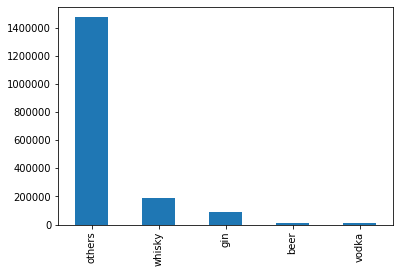

In [30]:
sales_data.consolidated_category.value_counts().plot.bar()

#### Liquor type sales over the years

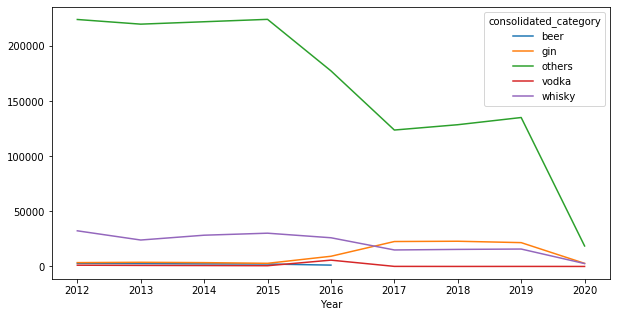

In [31]:
sales_data.groupby(['year','consolidated_category']).size().unstack().plot.line(figsize=(10,5))
plt.xlabel('Year');

#### Yearly liquor sales

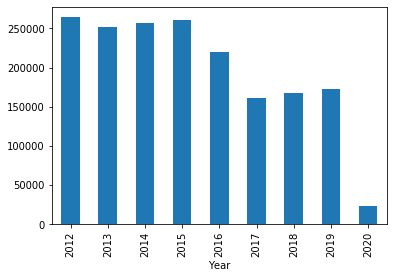

In [32]:
sales_data.year.value_counts().sort_index().plot.bar()
plt.xlabel('Year');

#### Monthly liquor sales

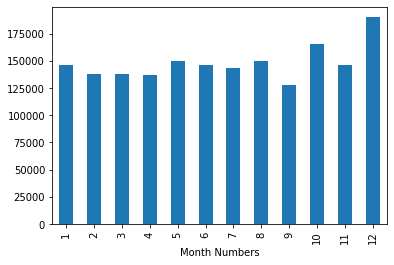

In [33]:
sales_data.month.value_counts().sort_index().plot.bar()
plt.xlabel('Month Numbers');

#### Monthly liquor sales over the years

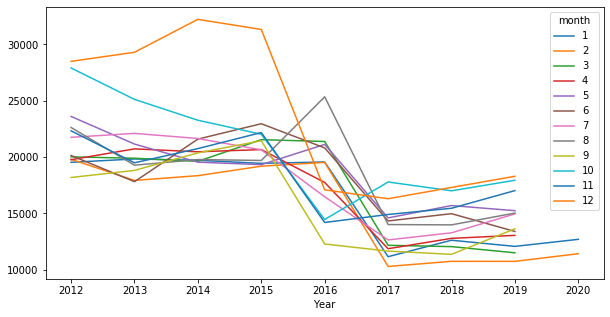

In [34]:
sales_data.groupby(['year','month']).size().unstack().plot.line(figsize=(10,5))
plt.xlabel('Year');

#### Seasonal liquor sales

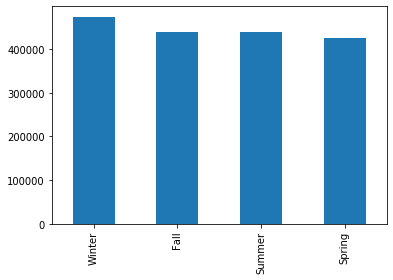

In [35]:
sales_data.season.value_counts().plot.bar()

#### Seasonal liquor sales over the years

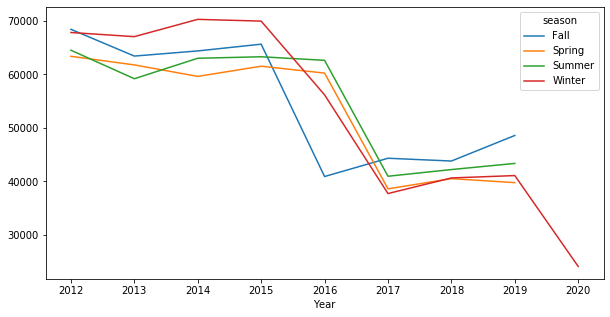

In [36]:
sales_data.groupby(['year','season']).size().unstack().plot.line(figsize=(10,5))
plt.xlabel('Year');

#### Day type liquor sales

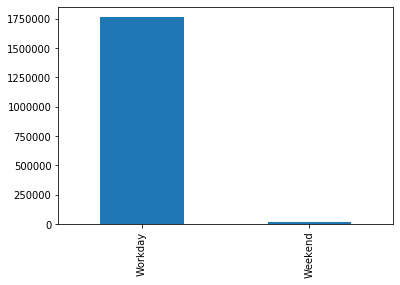

In [37]:
sales_data.holiday.value_counts().plot.bar()

#### Day type liquor sales over the years

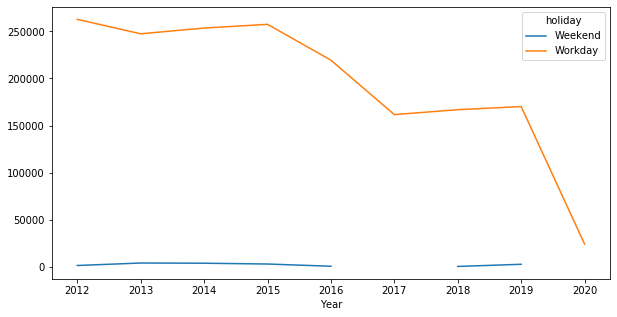

In [38]:
sales_data.groupby(['year','holiday']).size().unstack().plot.line(figsize=(10,5))
plt.xlabel('Year');

#### Day wise liquor sales

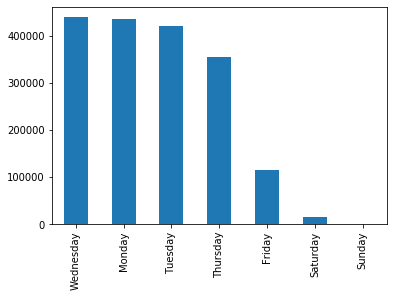

In [39]:
sales_data.weekday.value_counts().plot.bar()

#### Day wise liquor sales over the years

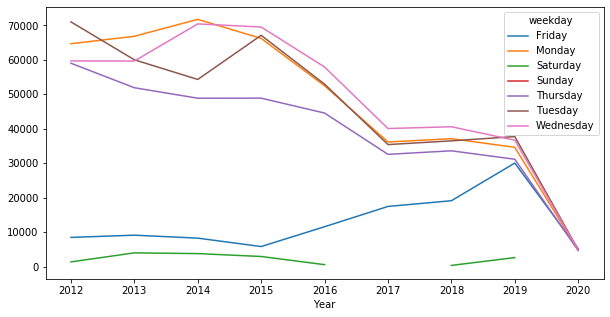

In [40]:
sales_data.groupby(['year','weekday']).size().unstack().plot.line(figsize=(10,5))
plt.xlabel('Year');

#### Time series sales over the years

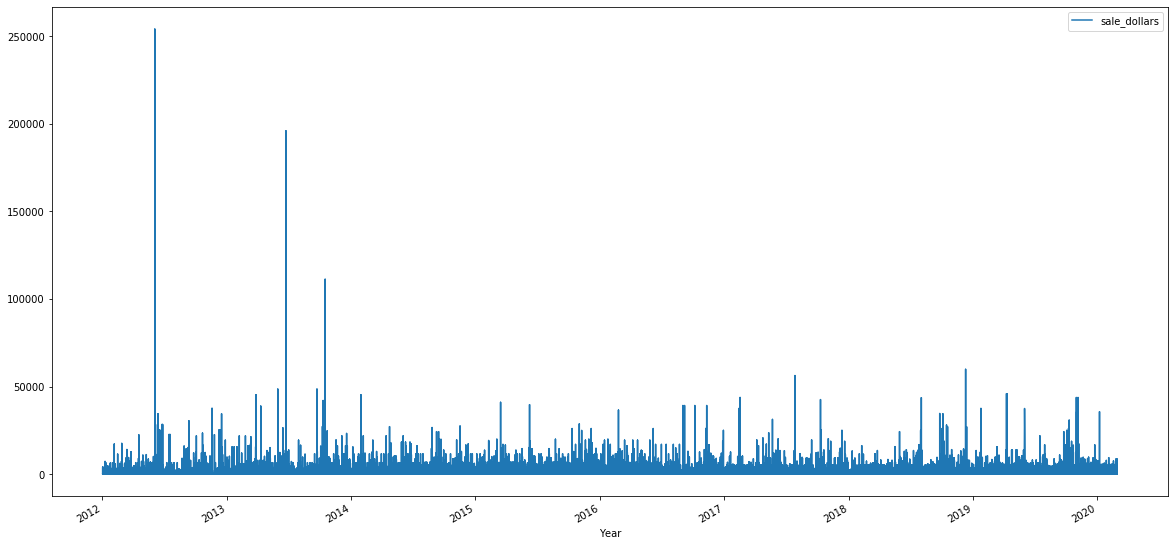

In [41]:
df = sales_data[['date','sale_dollars']]

df.plot.line(x = 'date', y = 'sale_dollars', figsize = (20,10))
plt.xlabel('Year');

### 4. Feature Engineering

Pulling out relevant details from the data to carry out analysis is termed as Feature Engineering. It helps in the selection of the important parameters which relatively carry a larger weightage than that of other features present. It is to ensure all the critical features are taken into consideration. Elimination of such features may result in poor performance of the ML algorithms.

In [42]:
sales_data.head()

,year,month,day,date,store_number,county_number,vendor_number,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,volume_sold_liters,volume_sold_gallons,consolidated_category,weekday,holiday,season,sale_dollars
0,2016,8,29,2016-08-29,2554,82.0,297.0,48,200,1.13,1.70,1,0.20,0.05,vodka,Monday,Workday,Summer,81.60
1,2019,2,13,2019-02-13,2556,32.0,346.0,8,300,8.75,13.13,8,2.40,0.63,others,Wednesday,Workday,Winter,105.04
3,2019,10,25,2019-10-25,5210,73.0,346.0,8,50,8.75,13.13,1,0.05,0.01,others,Friday,Workday,Fall,13.13
4,2017,7,11,2017-07-11,2285,52.0,384.0,6,750,11.50,17.25,18,13.50,3.57,others,Tuesday,Workday,Summer,310.50
5,2016,8,31,2016-08-31,2594,97.0,301.0,12,1000,11.92,17.88,2,2.00,0.52,vodka,Wednesday,Workday,Summer,214.56


#### Converting categorical feature into numeric representations. Many machine learning algorithms cannot operate on label data directly. They require all input variables and output variables to be numeric.

In [43]:
sales_data['consolidated_category'] = sales_data['consolidated_category'].astype('category').cat.codes

sales_data['weekday'] = sales_data['weekday'].astype('category').cat.codes

sales_data['holiday'] = sales_data['holiday'].astype('category').cat.codes

sales_data['season'] = sales_data['season'].astype('category').cat.codes


In [44]:
sales_data.head(10)

,year,month,day,date,store_number,county_number,vendor_number,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,volume_sold_liters,volume_sold_gallons,consolidated_category,weekday,holiday,season,sale_dollars
0,2016,8,29,2016-08-29,2554,82.0,297.0,48,200,1.13,1.70,1,0.20,0.05,3,1,1,2,81.60
1,2019,2,13,2019-02-13,2556,32.0,346.0,8,300,8.75,13.13,8,2.40,0.63,2,6,1,3,105.04
3,2019,10,25,2019-10-25,5210,73.0,346.0,8,50,8.75,13.13,1,0.05,0.01,2,0,1,0,13.13
4,2017,7,11,2017-07-11,2285,52.0,384.0,6,750,11.50,17.25,18,13.50,3.57,2,5,1,2,310.50
5,2016,8,31,2016-08-31,2594,97.0,301.0,12,1000,11.92,17.88,2,2.00,0.52,3,6,1,2,214.56
6,2016,8,29,2016-08-29,2190,77.0,205.0,6,1750,13.32,19.98,5,8.75,2.31,3,1,1,2,119.88
7,2016,8,30,2016-08-30,2527,77.0,277.0,6,1750,19.99,29.99,3,5.25,1.38,3,5,1,2,179.94
8,2017,1,27,2017-01-27,9001,52.0,125.0,6,750,17.50,26.25,18,13.50,3.57,2,0,1,3,472.50
9,2020,2,25,2020-02-25,2538,7.0,121.0,24,100,2.50,3.75,24,2.40,0.63,4,5,1,3,90.00
10,2018,5,25,2018-05-25,2190,77.0,547.0,6,750,69.96,104.94,11,8.25,2.18,4,0,1,1,1154.34


In [45]:
sales_data.dtypes

year                              int64
month                             int64
day                               int64
date                     datetime64[ns]
store_number                      int64
county_number                   float64
vendor_number                   float64
pack                              int64
bottle_volume_ml                  int64
state_bottle_cost               float64
state_bottle_retail             float64
bottles_sold                      int64
volume_sold_liters              float64
volume_sold_gallons             float64
consolidated_category              int8
weekday                            int8
holiday                            int8
season                             int8
sale_dollars                    float64
dtype: object

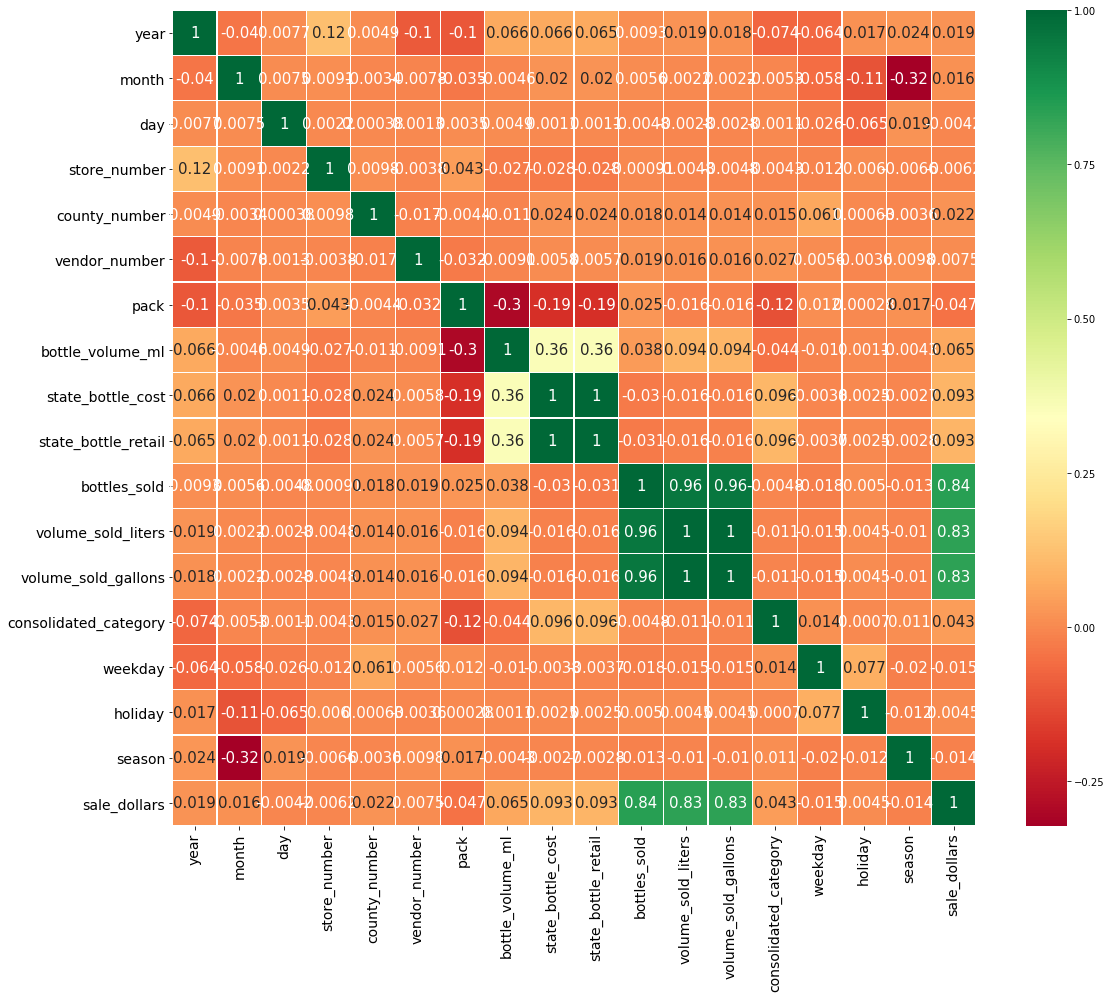

In [46]:
fig=sns.heatmap(sales_data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':15})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [47]:
sales_data.head()

,year,month,day,date,store_number,county_number,vendor_number,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,volume_sold_liters,volume_sold_gallons,consolidated_category,weekday,holiday,season,sale_dollars
0,2016,8,29,2016-08-29,2554,82.0,297.0,48,200,1.13,1.70,1,0.20,0.05,3,1,1,2,81.60
1,2019,2,13,2019-02-13,2556,32.0,346.0,8,300,8.75,13.13,8,2.40,0.63,2,6,1,3,105.04
3,2019,10,25,2019-10-25,5210,73.0,346.0,8,50,8.75,13.13,1,0.05,0.01,2,0,1,0,13.13
4,2017,7,11,2017-07-11,2285,52.0,384.0,6,750,11.50,17.25,18,13.50,3.57,2,5,1,2,310.50
5,2016,8,31,2016-08-31,2594,97.0,301.0,12,1000,11.92,17.88,2,2.00,0.52,3,6,1,2,214.56


#### Dropping colinear features (correlation factor > 0.7)

In [48]:
sales_data = sales_data.drop('bottle_volume_ml', axis=1)
sales_data = sales_data.drop('state_bottle_cost', axis=1)
sales_data = sales_data.drop('bottles_sold', axis=1)
sales_data = sales_data.drop('volume_sold_gallons', axis=1)

#### Dropping other irrelevant features.

In [49]:
sales_data = sales_data.drop('date', axis=1)

### 5. Outlier Identification

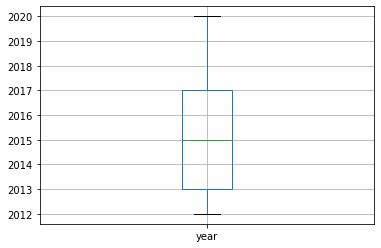

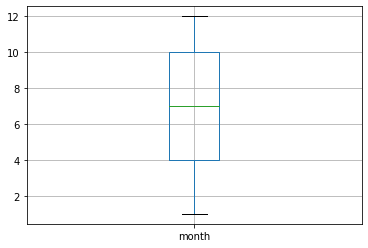

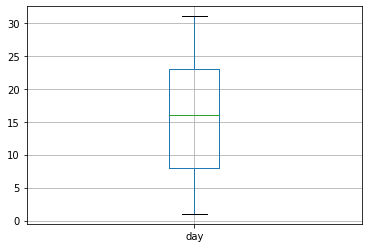

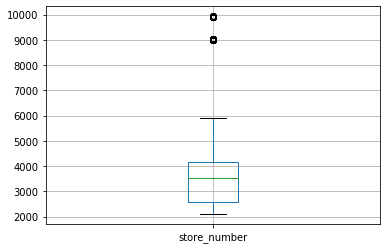

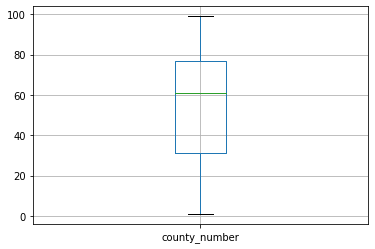

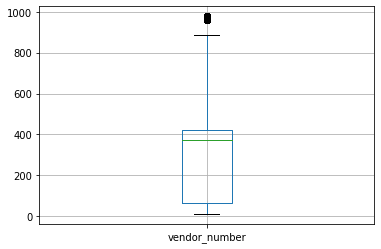

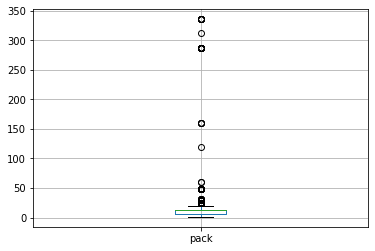

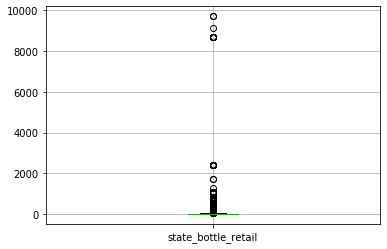

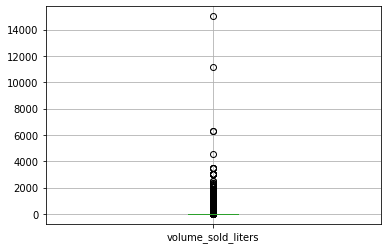

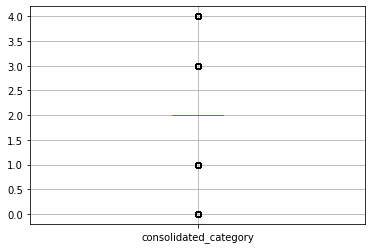

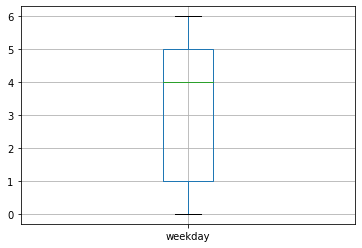

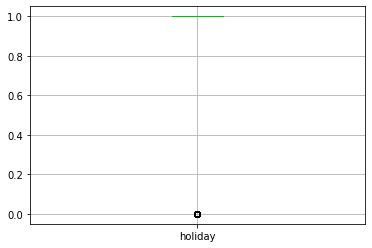

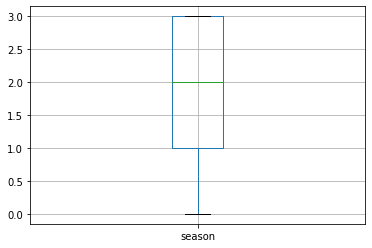

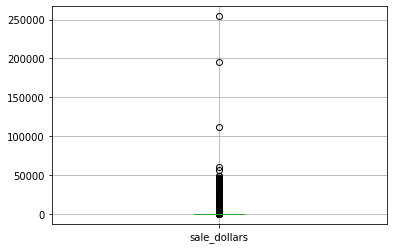

In [50]:
for column in sales_data.columns:
    
    plt.figure()
    sales_data.boxplot([column])


### 6. Machine Learning

#### Data Normalization

Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values.

In [51]:
from sklearn import preprocessing

x = sales_data.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()

x_scaled = min_max_scaler.fit_transform(x)
df_norm = pd.DataFrame(x_scaled, columns=sales_data.columns)

In [52]:
df_norm.head()

,year,month,day,store_number,county_number,vendor_number,pack,state_bottle_retail,volume_sold_liters,consolidated_category,weekday,holiday,season,sale_dollars
0,0.500,0.636364,0.933333,0.057209,0.826531,0.296488,0.140299,0.000175,0.000012,0.75,0.166667,1.0,0.666667,0.000321
1,0.875,0.090909,0.400000,0.057464,0.316327,0.347107,0.020896,0.001353,0.000159,0.50,1.000000,1.0,1.000000,0.000413
2,0.875,0.818182,0.800000,0.396373,0.734694,0.347107,0.020896,0.001353,0.000002,0.50,0.000000,1.0,0.000000,0.000052
3,0.625,0.545455,0.333333,0.022858,0.520408,0.386364,0.014925,0.001778,0.000899,0.50,0.833333,1.0,0.666667,0.001222
4,0.500,0.636364,1.000000,0.062316,0.979592,0.300620,0.032836,0.001843,0.000132,0.75,1.000000,1.0,0.666667,0.000844


In [53]:
df_norm.shape

(1779063, 14)

#### Setting up the dependent and independent variables.

In [54]:
X = df_norm.drop('sale_dollars', axis=1)
y = df_norm['sale_dollars']

print('Target dimentions: ',y.shape)
print('Independent data dimentions: ',X.shape)

Target dimentions:  (1779063,)
Independent data dimentions:  (1779063, 13)


#### Splitting the data into training and testing sets.

Trainning data will be used to train the model. This trained model will then be tested for its accuracy on the test data.
- Training size = 67%<br>
- Testing size = 33%

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

print('x_train dimentions: ',X_train.shape)
print('y_train  dimentions: ',y_train.shape)
print('x_test dimentions: ',X_test.shape)
print('y_test  dimentions: ',y_test.shape)

x_train dimentions:  (1191972, 13)
y_train  dimentions:  (1191972,)
x_test dimentions:  (587091, 13)
y_test  dimentions:  (587091,)


#### Creating dataframe to score model performance

In [56]:
from sklearn import metrics
from sklearn.metrics import r2_score

log_results = pd.DataFrame(columns = ['Algorithm',
                                      'Train Accuracy', 
                                      'Test Accuracy',
                                      'MAE',
                                      'MSE',
                                      'RMSE',
                                      'R^2',
                                      'Adjusted R^2',
                                      'Run Time in Seconds'])

#### Applying Regression Algorithms

#### 1. Linear Regression

Linear regression is a linear approach to modeling the relationship between a scalar response and one or more explanatory variables. The case of one explanatory variable is called a simple linear regression. For more than one explanatory variable, the process is called multiple linear regression.

It predicts the best fitting line that could justify the data points. The objective is to plot a line across the various data points which have the least aggregate distance from each of the data points.

It is mathematically represented as below

$
yi = β0 + β1.xi1 + β2.xi2 +...+ βp.xip
$

where, 
- yi = dependent variable
- xi = expanatory variables
- β0 = y-intercept (constant term)
- βp = slope coefficients for each explanatory variable

The algorithms identifies the best values for <b>β0</b> and <b>βp</b> that best fits the data.

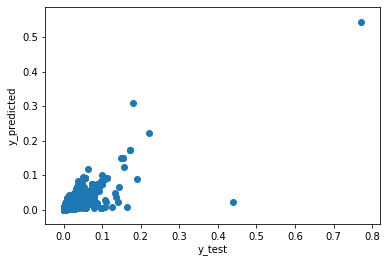

In [57]:
from sklearn.linear_model import LinearRegression

start = time.time()
rgr = LinearRegression().fit(X_train, y_train)
y_pred = rgr.predict(X_test)

Name       = rgr.__class__.__name__
Train_Acc  = rgr.score(X_train,y_train)
Test_Acc   = rgr.score(X_test,y_test)
MAE        = metrics.mean_absolute_error(y_test, y_pred)
MSE        = metrics.mean_squared_error(y_test, y_pred)
RMSE       = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
R_sq       = r2_score(y_test, y_pred)
Adj_R_sq   = 1 - (1-R_sq)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

end = time.time()
Runtime = int(end - start)
values = [Name, Train_Acc*100, Test_Acc*100, MAE, MSE, RMSE, R_sq, Adj_R_sq, Runtime]
row = pd.Series(values, index = log_results.columns)
log_results = log_results.append(row, ignore_index=True)

plt.scatter(y_test,y_pred)
plt.xlabel("y_test")
plt.ylabel("y_predicted")
plt.show()

#### 2. AdaBoost Regressor

- Boosting

It is an ensemble method for improving the model predictions of any given learning algorithm. The main idea behind boosting is to gradually correct the wrong predictions by adjusting the weights. It’s an iterative process that is self-optimizing.

It is a sequential process i.e., trees are grown using the information from a previously grown tree one after the another.

This process slowly learns from the data and tries to improve its prediction in subsequent iterations.

    y    = [10,5,3,67,22,56,76,2,5]
    
    y^_1 = [19,1,2,64,15,51,72,0,1]
    
    y^_2 = [12,3,2,66,19,54,73,1,3]
 
#### Adaptive Boosting

It is a meta algorithm wich is sensitive to noisy data and outliers.

1. Initialises weights to training points
2. Calculate the error rate for each prediction
3. Pick predictions with a lowest error rate
4. Compute the voting power of the prediction. 
5. Checks for satisfactory levels 
6. Update the weights of the predictions based on the prediction errors made.

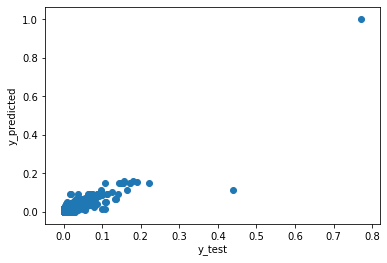

In [58]:
from sklearn.ensemble import AdaBoostRegressor

start = time.time()
rgr = AdaBoostRegressor().fit(X_train, y_train)
y_pred = rgr.predict(X_test)

Name       = rgr.__class__.__name__
Train_Acc  = rgr.score(X_train,y_train)
Test_Acc   = rgr.score(X_test,y_test)
MAE        = metrics.mean_absolute_error(y_test, y_pred)
MSE        = metrics.mean_squared_error(y_test, y_pred)
RMSE       = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
R_sq       = r2_score(y_test, y_pred)
Adj_R_sq   = 1 - (1-R_sq)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

end = time.time()
Runtime = int(end - start)
values = [Name, Train_Acc*100, Test_Acc*100, MAE, MSE, RMSE, R_sq, Adj_R_sq, Runtime]
row = pd.Series(values, index = log_results.columns)
log_results = log_results.append(row, ignore_index=True)

plt.scatter(y_test,y_pred)
plt.xlabel("y_test")
plt.ylabel("y_predicted")
plt.show()

#### 3. KNeighbors Regressor

1. It is a simple algorithm that stores all available cases and predicts the numerical target based on a similarity measure (mostly distance functions).
2. A simple implementation of KNN regression is to calculate the average of the numerical target of the K nearest neighbors.
3. KNN regressor uses the same distance functions as KNN classifier.
     
<img src="Images/Knn_Regressor.png"/>

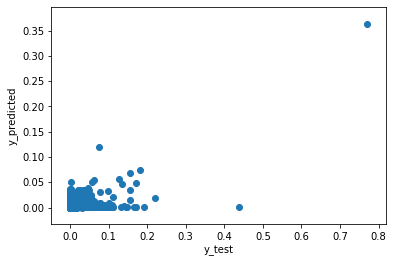

In [59]:
from sklearn.neighbors import KNeighborsRegressor

start = time.time()
rgr = KNeighborsRegressor(3).fit(X_train, y_train)
y_pred = rgr.predict(X_test)

Name       = rgr.__class__.__name__
Train_Acc  = rgr.score(X_train,y_train)
Test_Acc   = rgr.score(X_test,y_test)
MAE        = metrics.mean_absolute_error(y_test, y_pred)
MSE        = metrics.mean_squared_error(y_test, y_pred)
RMSE       = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
R_sq       = r2_score(y_test, y_pred)
Adj_R_sq   = 1 - (1-R_sq)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

end = time.time()
Runtime = int(end - start)
values = [Name, Train_Acc*100, Test_Acc*100, MAE, MSE, RMSE, R_sq, Adj_R_sq, Runtime]
row = pd.Series(values, index = log_results.columns)
log_results = log_results.append(row, ignore_index=True)

plt.scatter(y_test,y_pred)
plt.xlabel("y_test")
plt.ylabel("y_predicted")
plt.show()

#### 4. DecisionTree Regressor

1. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed.
2. It forms a tree with decision nodes and leaf nodes.
3. A decision node has two or more branches, each representing values for the attribute tested.
4. A leaf node represents a decision on the numerical target.
5. The topmost decision node in a tree that corresponds to the best predictor, is called the root node.
6. They can handle both categorical and numerical data.

<img src="Images/Decision_Tree_Regressor.png"/>

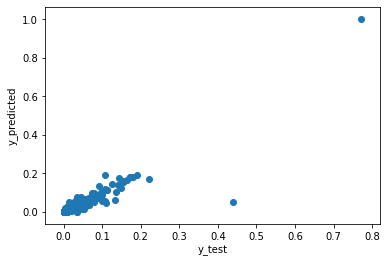

In [60]:
from sklearn.tree import DecisionTreeRegressor

start = time.time()
rgr = DecisionTreeRegressor().fit(X_train, y_train)
y_pred = rgr.predict(X_test)

Name       = rgr.__class__.__name__
Train_Acc  = rgr.score(X_train,y_train)
Test_Acc   = rgr.score(X_test,y_test)
MAE        = metrics.mean_absolute_error(y_test, y_pred)
MSE        = metrics.mean_squared_error(y_test, y_pred)
RMSE       = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
R_sq       = r2_score(y_test, y_pred)
Adj_R_sq   = 1 - (1-R_sq)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

end = time.time()
Runtime = int(end - start)
values = [Name, Train_Acc*100, Test_Acc*100, MAE, MSE, RMSE, R_sq, Adj_R_sq, Runtime]
row = pd.Series(values, index = log_results.columns)
log_results = log_results.append(row, ignore_index=True)

plt.scatter(y_test,y_pred)
plt.xlabel("y_test")
plt.ylabel("y_predicted")
plt.show()

#### 5. RandomForest Regressor

1. It is an ensemble technique (as they use a collection of results to make a final decision) which can perform both regression and classification tasks employing multiple decision trees.
2. It uses a technique called Bagging for each of the decision trees. Bagging refers to training each decision tree on different data samples, with replacement in the sampling.
3. It relies on multiple decision trees to produce the output, unlike relying on just a single decision tree.
4. Predictions from all trees are pooled to make the final prediction; the mode of the classes for classification or the mean prediction for regression.


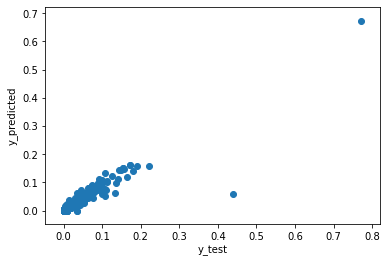

In [61]:
from sklearn.ensemble import RandomForestRegressor

start = time.time()
rgr = RandomForestRegressor().fit(X_train, y_train)
y_pred = rgr.predict(X_test)

Name       = rgr.__class__.__name__
Train_Acc  = rgr.score(X_train,y_train)
Test_Acc   = rgr.score(X_test,y_test)
MAE        = metrics.mean_absolute_error(y_test, y_pred)
MSE        = metrics.mean_squared_error(y_test, y_pred)
RMSE       = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
R_sq       = r2_score(y_test, y_pred)
Adj_R_sq   = 1 - (1-R_sq)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

end = time.time()
Runtime = int(end - start)
values = [Name, Train_Acc*100, Test_Acc*100, MAE, MSE, RMSE, R_sq, Adj_R_sq, Runtime]
row = pd.Series(values, index = log_results.columns)
log_results = log_results.append(row, ignore_index=True)

plt.scatter(y_test,y_pred)
plt.xlabel("y_test")
plt.ylabel("y_predicted")
plt.show()

#### Analysing the model performance

The following values are analysed to better understand the performance of any regression model. The symbols represented in the below formulae represent as follows

 - N : Total number of observations
 - y : Actual value
 - y^: Predicted value

<b>1. Mean Absolute Error (MAE):</b>

It is the average of the absolute difference between the actual and the predicted values of data. It represents the measure of how far the predicted values are from that of the actual values. It only specifies the magnitude, it does not represent the direction of the error. It is calculated as below.

<img src="Images/MAE1.PNG"/>

<b>2. Mean Square Error (MSE):</b>

It is much like Mean Absolute Error except that It calculates the average squared error between the predicted and actual values. It also provides a rough idea of the magnitude of the error.

<img src="Images/MSE1.PNG"/>

<b>3. Root Mean Square Error (RMSE):</b>

It measures the average magnitude of the error by taking the square root of the average of squared differences between prediction and actual observation. The RMSE is the square root of the variance of the residuals. Lower values of RMSE indicate a better fit. It is a good measure of how accurately the model predicts the response.

<img src="Images/RMSE1.PNG"/>

<b>4. R Squared:</b>

It is the proportion of the variance in the dependent variable that is predictable from the independent variable(s). It is known as the coefficient of determination. It is a statistical measure of how close the data are to the fitted regression line or indicates the goodness of fit of a set of predictions to the actual values. The value of R² lies between 0 and 1 where 0 means no-fit and 1 means perfectly-fit.

<b>5. Adjusted R squared:</b> 

R-squared explains the degree to which the input variable(s) explain the variation of output/predicted variable. Higher the R squared, the more variation is explained by the input variable(s) and hence better is the model. The Adjusted R-squared value is similar to the R-squared value, except that it accounts for the number of variable(s).

R-squared will either stay the same or increase with the addition of more variables, even if they do not have any relationship with the output variable. This is where “Adjusted R square” comes to help. Adjusted R-square penalizes for adding variables that are not useful for predicting the target.

In [62]:
log_results

,Algorithm,Train Accuracy,Test Accuracy,MAE,MSE,RMSE,R^2,Adjusted R^2,Run Time in Seconds
0,LinearRegression,71.192293,68.526683,0.000272,1.582158e-06,0.001258,0.685267,0.685260,1
1,AdaBoostRegressor,60.378515,59.477292,0.000518,2.037069e-06,0.001427,0.594773,0.594764,124
2,KNeighborsRegressor,55.273496,17.655845,0.000504,4.139426e-06,0.002035,0.176558,0.176540,3562
3,DecisionTreeRegressor,98.965441,90.083487,0.000139,4.985013e-07,0.000706,0.900835,0.900833,8
4,RandomForestRegressor,96.610120,92.524977,0.000137,3.757681e-07,0.000613,0.925250,0.925248,551
